## Add axis and labels for zoom in screenshots for spectra

* in this script you are able to insert as many screenshots as you wish to add the proper axis 
* at the moment if the images are associated with different axis values, please generate them in separate runs, otherwise update the script to handle lists for the spectra limits

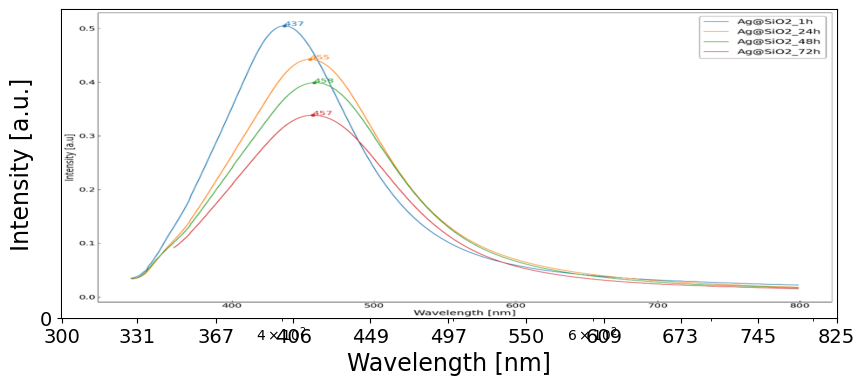

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# img file location
files = [ "C:/Users/maria/OneDrive - Universitatea Babeş-Bolyai/Desktop/Picture1_UVvis.png"]
lower_end_xLabel = [300.00]
upper_end_xLabel = [825.00]
lower_end_yLabel = [0.0]
upper_end_yLabel = [0.50]
step_size_xLabel = [100]
step_size_yLabel = [0.1]
y_delta = [0,0]
x_delta = [0,0]
x_title = ["Wavelength [nm]"]
y_title = ["Intensity [a.u.]"]
xlog = [True,True]
dark = [False,False]
title = [None,None]

for i,file in enumerate(files):
    img = plt.imread(file)
    if dark[i]:
        plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize=(10, 4))
    
    # Create a second axes for the image, no ticks, no frame
    ax_img = fig.add_axes(ax.get_position(), zorder=1)
    ax_img.imshow(img, aspect='auto')
    ax_img.axis('off')  # Hide image axes
    if xlog[i]:
        x = np.geomspace(lower_end_xLabel[i],upper_end_xLabel[i],step_size_xLabel[i],dtype=int)
        # ax.set_xlim((lower_end_xLabel[i],upper_end_xLabel[i]))
        ax.set_xscale('log')
        # x=np.delete(x,[1,2,3,4])
    else:
        x = np.arange(lower_end_xLabel[i]+x_delta[i],upper_end_xLabel[i]+x_delta[i],step_size_xLabel[i])
        # ax.set_xlim((lower_end_xLabel[i],upper_end_xLabel[i]))
    y = np.arange(lower_end_yLabel[i]+y_delta[i],upper_end_yLabel[i]+y_delta[i],step_size_yLabel[i])
    # print(x)

    xlim = (lower_end_xLabel[i], upper_end_xLabel[i])
    ylim = (lower_end_yLabel[i], upper_end_yLabel[i])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    # ax.set_ylim((lower_end_yLabel[i],upper_end_yLabel[i]))
    ax.set_xticks(x,labels=[f"{int(e)}" for e in x],fontsize=14)
    ax.set_yticks(y,labels=[f"{int(e)}" for e in y],fontsize=14)
    ax.set_xlabel(x_title[i],fontsize=17)
    ax.set_ylabel(y_title[i],fontsize=17)
    # ax.imshow(img, extent=(lower_end_xLabel[i], upper_end_xLabel[i],lower_end_yLabel[i], upper_end_yLabel[i]), aspect='auto', zorder = -1)
    if title[i] is not None:
        ax.set_title(title[i], fontsize=18)
    ax.plot()

    # Make axis lines visible
    for spine in ['left', 'top']:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_linewidth(1.5)
        ax.spines[spine].set_color('black')
    plt.style.use('default')